In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Leer el CSV desde URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Coeficiente (pendiente): 0.05
Intersección (bias): 7.12
MSE: 10.204654118800956
R²: 0.6766954295627076


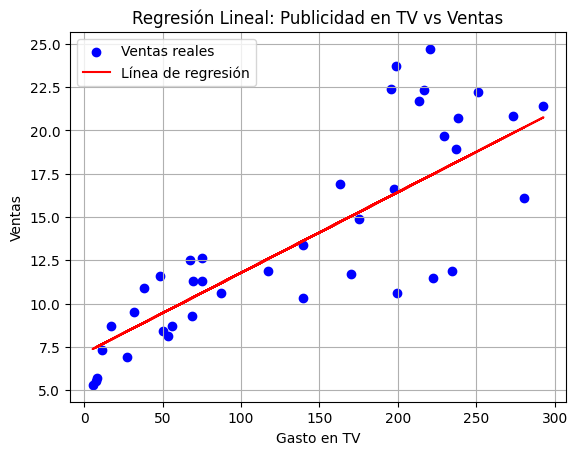

In [6]:
# Seleccionamos sólo la columna 'TV' como X, y 'sales' como y
# Veremos una regresion lineal donde veremos que tanto aumentan 
# las ventas, segun se invierta en publicidad en las televisoras.
X = df[['TV']]
y = df['sales']

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
print(f"Coeficiente (pendiente): {modelo.coef_[0]:.2f}")
print(f"Intersección (bias): {modelo.intercept_:.2f}")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Gráfico
plt.scatter(X_test, y_test, color='blue', label='Ventas reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel("Gasto en TV")
plt.ylabel("Ventas")
plt.title("Regresión Lineal: Publicidad en TV vs Ventas")
plt.legend()
plt.grid(True)
plt.show()